# Análise Preditiva sobre o Câncer de Pulmão 


## Ciência dos Dados - 2° Semestre
### Autores:
- Ana Laiz Novais de Farias
- Alexia Barbosa Pires
- Diogo Pereira Lobo

<img src="imagens/cancer.png" style="width:1200px;height:350px;">

### Introdução
A análise preditiva consiste em prever resultados a partir de modelos baseados em machine learning, baseada em uma variável principal, que, no neste projeto é a "Cancer de pulmão" ou "Lung Cancer" e outras variáveis secundárias que seão descritas mais abaixo. Neste projeto usaremos três modelos classificadores diferentes: Regressão Logiística, Random Forest ou 'Floresta aleatória" e Decision Tree ou "Árvore de Decisão", para prevermos o quanto outros fatores podem influenciar ou não o desenvolvimento de um cancer de pulmão. Utilizaremos uma base de dados retirada do site 'Kagle".

In [103]:
import requests
import pandas as pd
import plotly.express as px
import os.path
import numpy as np
from math import floor
import seaborn as sns
from ipywidgets import IntProgress
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Diretório e base de dados

In [104]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\Alexia\Documents\2º Semestre\CDados\Projetos\P2-cancer-pulmao\predicao_cancer_pulmao


In [105]:
base = pd.read_csv('surveylungcancer.csv')

In [106]:
base.shape[0]

309

### Limpeza de dados

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

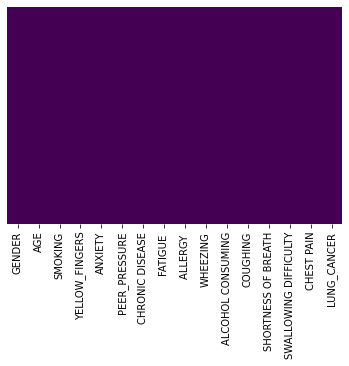

In [107]:
# Usamos heatmap da biblioteca seaborn para identificar elementos nulos e o comando isnull que verifica linhas nulas
sns.heatmap(base.isnull(),yticklabels=False,cbar=False,cmap="viridis")
base.isnull().sum()

Logo, podemos concluir que os dados vieram livres de elementos nulos, tanto nas linhas, assim como nas colunas. 

In [108]:
# dropna() remove os valores nulos (valores ausentes) do DataFrame , deixando cair as linhas ou colunas que contêm os valores 
#nulos. Os valores nulos são NaN ( Not a Number ) e NaT ( Not a Time )
base.dropna(inplace=True)
base

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [109]:
base.shape[0]

309

In [110]:
#A função value_counts retorna o valor da contagem para cada item exclusivo presente na coluna
base.GENDER.value_counts()

M    162
F    147
Name: GENDER, dtype: int64

In [111]:
lista = [nome.strip() for nome in base.columns]
base.columns =  lista 

Com isso, é possível perceber que o número de homens que responderam a pesquisa foi de 162 e o número de mulheres foi de 147.

# Análises Iniciais
Primeiro limpamos a base de dados para conseguirmos filtrar os dados de maneira eficiente, retirando epaços ou caracteres especiais que dificultam a análise.

In [112]:
# Trocando os nomes das linhas da coluna Lung_Cancer 
# YES = 2 e NO = 1
for i in range(len(base['LUNG_CANCER'])):
    if base['LUNG_CANCER'][i] == 'YES':
        base.loc[i ,'LUNG_CANCER'] = 2
    else: 
        base.loc[i ,'LUNG_CANCER'] = 1 
display(base)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,2
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,2
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,2
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,2


Filtragem dos dados separando pessoas que têm chances de ter câncer de pulmão das que não têm:

In [113]:
yes_cancer = base.loc[base['LUNG_CANCER'] == 2]
no_cancer = base.loc[base['LUNG_CANCER'] == 1]
print(f"{yes_cancer.shape[0]}, {no_cancer.shape[0]}")

270, 39


In [114]:
base.AGE.describe()

count    309.000000
mean      62.673139
std        8.210301
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

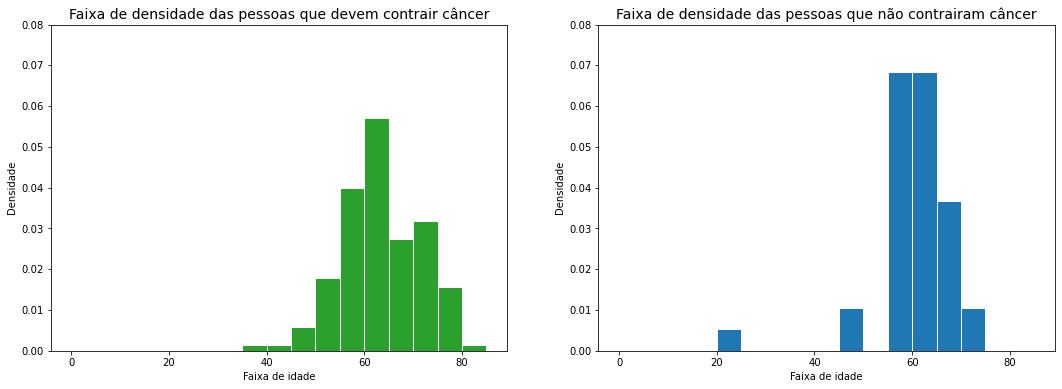

In [115]:
range_AGE = np.arange(0, 90,5)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.hist(yes_cancer.AGE, bins = range_AGE, edgecolor='white', density = True, color = 'tab:Green')
plt.title("Faixa de densidade das pessoas que devem contrair câncer", size=14)
plt.xlabel("Faixa de idade")
plt.ylabel("Densidade")
plt.ylim(0,0.08)

plt.subplot(122)
plt.hist(no_cancer.AGE, bins = range_AGE, edgecolor='white', density = True, color = 'tab:blue')
plt.title("Faixa de densidade das pessoas que não contrairam câncer", size=14)
plt.xlabel("Faixa de idade")
plt.ylabel("Densidade")
plt.ylim(0,0.08)


plt.show()

# Análise da correlação de Dedos Amarelos e o Câncer de pulmão

In [116]:
#Gráfico correlativo de cancer and yellow_fingers.
dyf = base.groupby(by=["YELLOW_FINGERS", "LUNG_CANCER"]).size().reset_index(name="counts")
dyf

,YELLOW_FINGERS,LUNG_CANCER,counts
0,1,1,26
1,1,2,107
2,2,1,13
3,2,2,163


In [117]:
px.histogram(data_frame=dyf, x="LUNG_CANCER", y="counts", color="YELLOW_FINGERS", barmode='group',
             color_discrete_sequence=px.colors.qualitative.Bold)

# Análise da correlação da Ansiedade e o Cancer de Pulmão

In [118]:
#Gráfico correlativo de cancer and anxiety
dan = base.groupby(by=["ANXIETY", "LUNG_CANCER"]).size().reset_index(name="counts")
dan

,ANXIETY,LUNG_CANCER,counts
0,1,1,27
1,1,2,128
2,2,1,12
3,2,2,142


In [119]:
px.histogram(data_frame=dan, x="LUNG_CANCER", y="counts", color="ANXIETY", barmode='group',
             color_discrete_sequence=px.colors.qualitative.T10)


# Análise da correlação da Pressão Alta e o Câncer de Pulmão

In [120]:
#Gráfico correlativo de cancer and peer_pressure
dpp = base.groupby(by=["PEER_PRESSURE", "LUNG_CANCER"]).size().reset_index(name="counts")
dpp

,PEER_PRESSURE,LUNG_CANCER,counts
0,1,1,29
1,1,2,125
2,2,1,10
3,2,2,145


In [121]:
px.histogram(data_frame=dpp, x="LUNG_CANCER", y="counts", color="PEER_PRESSURE", barmode='group',
             color_discrete_sequence=px.colors.qualitative.Alphabet)


# Análise da correlação da Respiração Curta e o Cancer de Pulmão

In [122]:
# Gráfico correlativo de cancer and shortness of breath
dsb = base.groupby(by=["SHORTNESS OF BREATH", "LUNG_CANCER"]).size().reset_index(name="counts")
dsb

,SHORTNESS OF BREATH,LUNG_CANCER,counts
0,1,1,17
1,1,2,94
2,2,1,22
3,2,2,176


In [123]:
px.histogram(data_frame=dpp, x="LUNG_CANCER", y="counts", color="PEER_PRESSURE", barmode='group',
             color_discrete_sequence=px.colors.qualitative.Dark2)

# Análise da correlação da Dificuldade de Deglutição e o Câncer de Pulmão

In [124]:
dsd = base.groupby(by=["SWALLOWING DIFFICULTY", "LUNG_CANCER"]).size().reset_index(name="counts")
dsd

,SWALLOWING DIFFICULTY,LUNG_CANCER,counts
0,1,1,34
1,1,2,130
2,2,1,5
3,2,2,140


In [125]:
px.histogram(data_frame=dsd, x="LUNG_CANCER", y="counts", color="SWALLOWING DIFFICULTY", barmode='group',
             color_discrete_sequence=px.colors.qualitative.Dark24)

# Análise da correlação da Dor no Peito e o Câncer de Pulmão

In [126]:
dcp = base.groupby(by=["CHEST PAIN", "LUNG_CANCER"]).size().reset_index(name="counts")
dcp

,CHEST PAIN,LUNG_CANCER,counts
0,1,1,27
1,1,2,110
2,2,1,12
3,2,2,160


In [127]:
px.histogram(data_frame=dcp, x="LUNG_CANCER", y="counts", color="CHEST PAIN", barmode='group',
             color_discrete_sequence=px.colors.qualitative.Prism)

## Análise da correlação entre gênero e câncer de pulmão:


In [128]:
base_gerder = base.groupby(by=["GENDER", "LUNG_CANCER"]).size().reset_index(name="counts")

base_gerder

,GENDER,LUNG_CANCER,counts
0,F,1,22
1,F,2,125
2,M,1,17
3,M,2,145


In [129]:
#Gráfico da relação entre eles
px.histogram(data_frame=base_gerder, x="LUNG_CANCER")
px.histogram(data_frame=base_gerder, x="LUNG_CANCER", y="counts", color="GENDER", barmode='group', color_discrete_sequence=px.colors.qualitative.Bold)


## Correlação entre Asma e Câncer de Pulmão:
### Legenda:
'Wheeling' : Asma = Não possui = 1

'Wheeling' : Asma = Possui = 2


In [130]:
base_asma = base.groupby(by=["WHEEZING", "LUNG_CANCER"]).size().reset_index(name="counts")
base_asma 

,WHEEZING,LUNG_CANCER,counts
0,1,1,30
1,1,2,107
2,2,1,9
3,2,2,163


In [131]:
#Gráfico da relação entre asma e cancer de pulmão
px.histogram(data_frame=base_asma, x="LUNG_CANCER", y="counts", color="WHEEZING", barmode='group', color_discrete_sequence=px.colors.qualitative.Alphabet)


## Consumo de alcool e câncer no pulmão

#### NO ALCOHOL CONSUMING = 1 
#### YES ALCOHOL CONSUMING = 2

In [132]:
dados_alcohol = base.groupby(by=["ALCOHOL CONSUMING", "LUNG_CANCER"]).size().reset_index(name="counts")
dados_alcohol

,ALCOHOL CONSUMING,LUNG_CANCER,counts
0,1,1,32
1,1,2,105
2,2,1,7
3,2,2,165


In [133]:
#Gráfico consumo de alcool vs cancer
px.histogram(data_frame=dados_alcohol, x="LUNG_CANCER", y="counts", color="ALCOHOL CONSUMING", barmode='group', color_discrete_sequence=px.colors.qualitative.Dark24)


## Correlação entre Tosse crônica e câncer de pulmão:

In [134]:
dados_tosse = base.groupby(by=["COUGHING", "LUNG_CANCER"]).size().reset_index(name="counts")
dados_tosse

,COUGHING,LUNG_CANCER,counts
0,1,1,29
1,1,2,101
2,2,1,10
3,2,2,169


In [135]:
px.histogram(data_frame=dados_tosse, x="LUNG_CANCER", y="counts", color="COUGHING", barmode='group', color_discrete_sequence=px.colors.qualitative.Alphabet)


## Análise da correlação entre Fumar e o Câncer de Pulmão

In [136]:
dg = base.groupby(by=["SMOKING", "LUNG_CANCER"]).size().reset_index(name="counts")
dg

,SMOKING,LUNG_CANCER,counts
0,1,1,20
1,1,2,115
2,2,1,19
3,2,2,155


In [137]:
px.histogram(data_frame=dg, x="LUNG_CANCER", y="counts", color="SMOKING", barmode='group', color_discrete_sequence=px.colors.qualitative.Dark24)

## Análise da correlação entre Doença Crônica e o Cancer de Pulmão

In [138]:
dg0 = base.groupby(by=["CHRONIC DISEASE", "LUNG_CANCER"]).size().reset_index(name="counts")
dg0

,CHRONIC DISEASE,LUNG_CANCER,counts
0,1,1,25
1,1,2,128
2,2,1,14
3,2,2,142


In [139]:

px.histogram(data_frame=dg0, x="LUNG_CANCER", y="counts", color="CHRONIC DISEASE", barmode='group', color_discrete_sequence=px.colors.qualitative.Alphabet)

## Análise da correlação entre Fadiga e Câncer de Pulmão

In [142]:
dg1 = base.groupby(by=["FATIGUE", "LUNG_CANCER"]).size().reset_index(name="counts")
dg1

,FATIGUE,LUNG_CANCER,counts
0,1,1,20
1,1,2,81
2,2,1,19
3,2,2,189


In [ ]:
px.histogram(data_frame=dg1, x="LUNG_CANCER", y="counts", color="FATIGUE", barmode='group')

## Análise da correlação entre Alergia e o Câncer de pulmão

In [ ]:
dg2 = base.groupby(by=["ALLERGY", "LUNG_CANCER"]).size().reset_index(name="counts")
dg2

,ALLERGY,LUNG_CANCER,counts
0,1,1,34
1,1,2,103
2,2,1,5
3,2,2,167


In [ ]:
px.histogram(data_frame=dg2, x="LUNG_CANCER", y="counts", color="ALLERGY", barmode='group', color_discrete_sequence=px.colors.qualitative.Bold)


In [ ]:
X = base[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
X = pd.get_dummies(X)

# YES = 2 e NO = 1 (trocando os targets de Gender_F e Gender_M para 2 e 1 , no lugar de 0 e 1)
for i in range(len(X['GENDER_F'])):
    if X['GENDER_F'][i] == 0:
        X.loc[i ,'GENDER_F'] = 1
    else: 
        X.loc[i ,'GENDER_F'] = 2 
        
for i in range(len(X['GENDER_M'])):
    if X['GENDER_M'][i] == 0:
        X.loc[i ,'GENDER_M'] = 1
    else: 
        X.loc[i ,'GENDER_M'] = 2 
display(X)

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_F,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,2
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,2
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2,1
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,2
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,2,1
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,2
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,2
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,2


In [ ]:
y = base['LUNG_CANCER'].astype('int')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

<img src="imagens/Regressão Logística.png" style="width:1200px;height:350px;">

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, em função de uma ou mais variáveis independentes contínuas e/ou binárias. Apesar de parecer algo muito inacessível, a regressão logística é bastante utilizada em ciências médicas e sociais. No campo da medicina é possível determinar determinar os conjunto de fatores que torna um grupo de indivíduos doentes quando comparamos com indivíduos saudáveis. Podem existir também outros nomes: modelo logístico, modelo logit, ou classificador de máxima entropia. Portanto, podemos concluir que Regressão Logística busca estimar a probabilidade da variável dependente assumir um determinado valor em função dos outros valores. 

A regressão logística é um algoritmo de aprendizagem de máquina supervisionado utilizado para classificação, apesar de ter a palavra regressão em seu nome. Essa nomenclatura está relacionada com o fato da Regressão Logística ser construída a partir da aplicação de uma transformação/função (denominada função logística ou sigmoide) sobre a Regressão Linear.

Para entender a motivação por trás da definição da regressão logística é interessante que se entenda as premissas e o objetivo do algoritmo de regressão linear, afinal ele é o ponto de partida da análise matemática que iremos fazer. No entanto, vou tentar explicar este modelo de forma independente e compreensível, e em outro momento falaremos somente sobre regressão linear.

Quando estamos lidando com um problema de regressão a variável alvo é um número real, ou seja, o resultado da predição pode cair dentro do intervalo dos números reais [-∞, +∞]. Tomando como exemplo a imagem abaixo, a variável alvo Custo (do plano de saúde, neste exemplo) é plotada em função do atributo Idade, onde pode-se notar uma relação linear entre elas, em que quanto maior a idade de uma pessoa, maior será o custo do plano de saúde. Dessa forma, o objetivo da regressão linear é encontrar a equação da reta que melhor se ajusta ao conjunto de dados, isto é, encontrar a combinação dos coeficientes b0 (coeficiente linear) e b1 (coeficiente angular) que irá minimizar os erros de predição.

<img src="imagens/0_KigCyIJKGuJTmJqj.png" style="width:1000px;height:500px;">>

No entanto, em um problema de classificação, aplicar a técnica de regressão linear diretamente não faz sentido, uma vez que se objetiva prever rótulos e não valores quantitativos. No exemplo abaixo temos a variável alvo Pagar (um empréstimo), que pode assumir o valor 1 (indicando que o cliente pagou o empréstimo) ou o valor 0 (o cliente não pagou o empréstimo), e o atributo Idade que nesse caso indica que quanto maior a idade maiores as chances de que um dado cliente pague o empréstimo. Nesse tipo de problema binário o resultado da predição estará dentro do intervalo [0, 1].

<img src="imagens/0_JL2irOqEb0_MV07j.png" style="width:900px;height:600px;">

Nesse contexto, seria interessante ter uma função que apenas admita uma saída dentro do intervalo [0, 1], ou seja, dado uma combinação linear dos atributos (um número real qualquer) a saída dessa função estaria dentro do intervalo [0, 1], permitindo que o resultado seja mapeado em classes/rótulos. São justamente estas as características que a função logística/sigmoide consegue suprir para atingir a solução para esse problema, daí a sua importância.

A função sigmoide é matematicamente definida por:

<center><img src="imagens/1_xjKzLeMxv-7e9FeWJBlsYA.png"></center>

Onde p representa a probabilidade de uma dada instância pertencer a classe analisada — evento (normalmente é definido como sendo o evento positivo/verdadeiro — 1).

y é um número real dado pela combinação linear dos atributos utilizados na predição, derivado da regressão linear.
Dessa forma, a função sigmoide recebe um número real (combinação linear de variáveis) como entrada e retorna uma saída dentro do intervalo [0, 1], que representa a probabilidade do registro de entrada pertencer a classe evento (1, por exemplo).

Para realizar uma classificação a partir de uma probabilidade se define um limiar de decisão (threshold), onde registros cuja probabilidade ultrapasse esse limiar são classificados como sendo da classe 1, caso contrário serão considerados da classe 0. Sendo assim, a regressão logística não só é capaz de classificar instâncias mas também de informar a certeza/incerteza associada com a classificação, através do valor de probabilidade calculada.



<center><img src="imagens/0_wUJ1p_Sol9P734fO.png"></center>

É a equação de uma reta e define a técnica de regressão linear, temos a partir da equação (1):

<img src="imagens/1_9usZhPMukggWCik_-cvqzA.png" >


Portanto, podemos rearranjar os termos e reescrever a equação (3) como:

<img src="imagens/1_GTcxhFu4iDTPw0G2Ho3P5A.png">


<img src="imagens/1_Y1ySWYKloB5_eDF1f74ZoQ.png">

Essa equação representa a função inversa da função logística, chamada de função logit. Podemos notar que dado uma probabilidade como entrada (com valores definidos no intervalo [0, 1], por definição) a saída é representada por um número real, este definido pela equação da reta (regressão linear).

<img src="imagens/0_eCbkiIYeC1FHS_3R.png">


No domínio da probabilidade, a expressão:

<img src="imagens/1_VSleKFM8ZXiw5d6E-EEqMw.png">


# Decision Trees

<img src="imagens/Decision Tree.png" style="width:1200px;height:300px;">

Uma decision tree pode ser aplicada para identificar doenças a partir de informações cedidas ao algoritmo como treinamento — uma classificação. Nesse caso, o sistema apreende os dados, entende suas relações, realiza os cálculos a fim de entender quais são os nós mais importantes e ajusta as condições. 

Como o próprio nome sugere, neste algoritmo vários pontos de decisão serão criados. Estes pontos são os “nós” da árvore e em cada um deles o resultado da decisão será seguir por um caminho, ou por outro. Os caminhos existentes são os “ramos”. Esta é a estrutura básica de uma árvore de decisão. Os nós são responsáveis pelas conferências que irão indicar um ramo ou outro para sequência do fluxo.

Na imagem abaixo vemos uma árvore de decisão extremamente simples, apenas com dois nós e poucos ramos.
<img src="imagens/image-1.png">

É claro que, em uma situação como esta, não será necessário um algoritmo que nos diga se iremos a praia ou não, mas a ideia é válida para este aprendizado. Entendendo como esta árvore foi criada, você entenderá a lógica de uma árvore de decisão.

<img src="imagens/image-4.png">

Esta é a tabela que levou à criação da árvore apresentada. Como podemos ver, todas as vezes em que a coluna “Sol?” é igual a “Não”, a pessoa não foi para praia. Esta coluna foi utilizada na primeira pergunta, ou no primeiro nó de nossa árvore, sendo que sempre que a informação na coluna “Sol?” for “Não”, nossa árvore de decisão responderá que a pessoa não foi para praia. Porém quando esta resposta for “Sim”, temos casos onde a pessoa foi para praia e outros em que ela não foi.

Ou seja, é necessário fazermos mais uma pergunta para definirmos a resposta, levando assim a segunda pergunta, ou segundo nó de nossa árvore, que irá conferir a informação existente na coluna “Vento?”.

É importante observamos que esta mesma tabela poderia levar a construção de uma árvore diferente. Se primeiramente conferirmos o valor da variável “Vento?” veremos que em todos os dias com vento não fomos para praia. Em dias sem vento, conferimos também se havia sol, para então definir a resposta final.

<img src="imagens/image-5.png">

Neste simples exemplo vemos que normalmente não existirá uma única árvore de decisão para um mesmo problema, sendo que com diferentes árvores poderemos chegar a um mesmo resultado.

### Definindo os nós e ramos
Assim como podemos ter mais de uma árvore para um mesmo problema, também podemos utilizar diferentes métodos de cálculo na criação de uma árvore de decisão. Estes métodos são os responsáveis pela definição da estrutura e resultado final da árvore, e tentam buscar a estrutura mais otimizada para o problema em questão.

<img src="imagens/image-2.png">

Imagine que em nosso exemplo anterior os dados fossem um pouco diferentes, sendo que em todos os dias de sol fomos para a praia, e em dias sem sol, não fomos. Nesta situação, a árvore não precisaria conferir se existe vento ou não, pois independente desta informação o resultado seria o mesmo. Ou seja, nossa variável target “Vou para praia?” seria totalmente explicada pela variação da variável preditora “Sol?”, resultando em uma árvore com apenas um nó.

Os métodos utilizados pelos algoritmos irão buscar justamente estas variáveis dentre todas as preditoras, identificando aquelas que possuem maior relação com a variável target, e colocando-as no topo da árvore, em seus nós principais.

### Entropia 

através da entropia o algoritmo verifica como os dados estão distribuídos nas variáveis preditoras de acordo com a variação da variável target. Quanto maior a entropia, maior a desordem dos dados; e quanto menor, maior será a ordem destes dados, quando analisados pela ótica da variável target. Partindo da entropia, o algoritmo confere o ganho de informação de cada variável. Aquela que apresentar maior ganho de informação será a variável do primeiro nó da árvores.
Podemos entender o ganho de informação como a medida de quão bem relacionados os dados da variável preditora estão com os dados da variável target (ou o quanto a variável target pode ser explicada a partir da variável preditora), sendo que a variável com melhor desempenho será a escolhida para iniciar a árvore.




### Índice GINI 

com o cálculo do índice GINI, assim como na Entropia, será verificada a distribuição dos dados nas variáveis preditoras de acordo com a variação da variável target, porém com um método diferente. A variável preditora com o menor índice Gini será a escolhida para o nó principal da árvore, pois um baixo valor do índice indica maior ordem na distribuição dos dados.



### Regressão 

nos problemas de regressão nosso objetivo é prever um valor, e não uma classe. Para isso a árvore utilizará os conceitos de média e desvio padrão, que possibilitarão um resultado final numérico.
Para definir as variáveis preditoras dos nós principais em um problema de regressão, será calculado o desvio padrão dos valores da variável target para cada variável preditora, de acordo com suas variações. Desta forma teremos um valor de desvio padrão para cada variável preditora e, comparando-o com o desvio padrão da variável target completa, chegaremos a redução de desvio padrão que a variável preditora em questão aplicou sobre a variável target.
Lembrando que o desvio padrão indica o quão distante os valores estão da média, podemos entender que uma variável com grande redução de desvio padrão indica que através dela a variável target se aproxima da média, mostrando uma grande relação entre a variável preditora e a variável target. Portanto, a variável preditora com maior redução de desvio padrão será escolhida para o nó principal da árvore.

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
# Precisa instalar o graphviz no seu windows, acesse o link
# https://graphviz.org/download/
# e baixe a versão executável Windows 64 bits

# Depois disso, faça a instalação do graphviz no python com o comando (se estiver dentro do notebook, acidione exclamação no inicio)
# pip install graphviz

# Cria um classificador
classificador = tree.DecisionTreeClassifier()

# Treina ele
classificador.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
classificador.score(X_test, y_test)

0.9102564102564102

In [141]:
# a árvore
from sklearn import tree
import graphviz

gclassif = tree.export_graphviz(classificador, out_file = None,
                                feature_names = X_train.columns.to_list(),
                                class_names = None,
                                filled = True, rounded = True,
                                special_characters = True)

garv = graphviz.Source(gclassif)
garv


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Dtreeviz 

A biblioteca Scikit-learn vem inerentemente com o recurso de plotagem para árvores de decisão. No entanto, existem algumas inconsistências com a opção padrão. Este artigo examinará uma alternativa chamada dtreeviz que renderiza visualizações mais intuitivas e com melhor aparência, oferecendo maiores opções de interpretabilidade.

O algoritmo dos modelos de árvore de decisão funciona particionando repetidamente os dados em vários subespaços para que os resultados em cada subespaço final sejam o mais homogêneos possível. Essa abordagem é tecnicamente chamada de particionamento recursivo . O algoritmo tenta dividir os dados em subconjuntos para que cada subgrupo seja o mais puro ou homogêneo possível.

In [ ]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

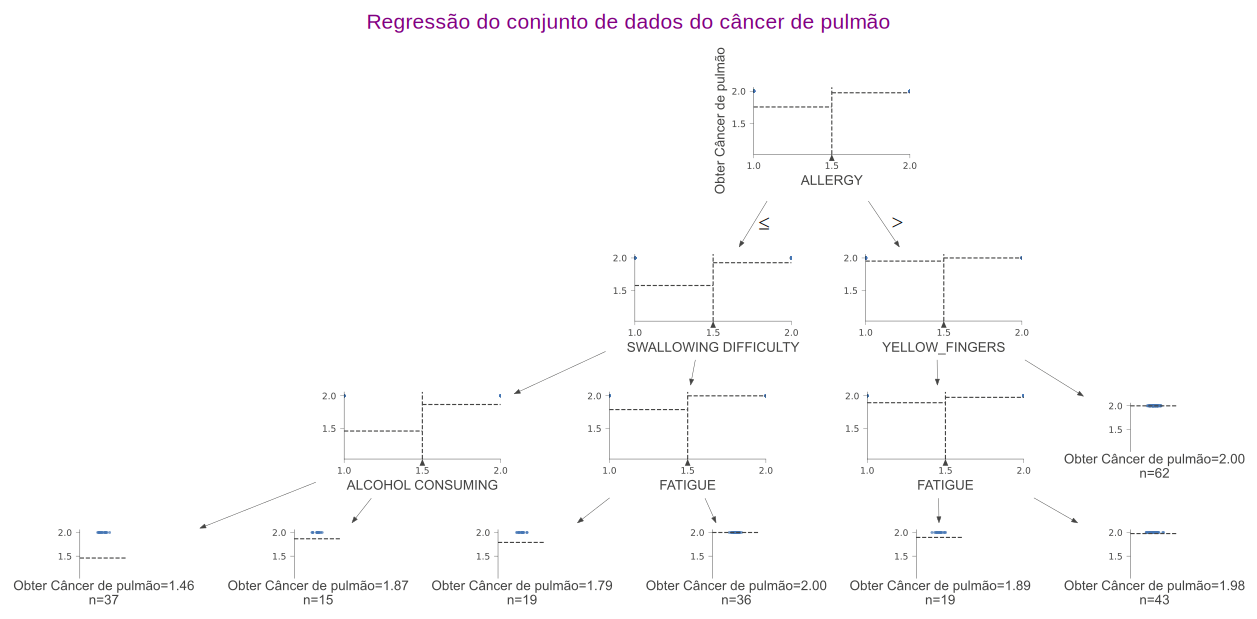

<Figure size 1800x1440 with 0 Axes>

In [ ]:
# # Árvore de regressão nos dados do cancer de pulmão
fig = plt.figure(figsize=(25,20))
regr= tree.DecisionTreeRegressor(max_depth=3)  
regr.fit(X_train, y_train)
viz = dtreeviz(regr,
               X_train,
               y_train,
               target_name='Obter Câncer de pulmão',
               feature_names=X_train.columns,
               title="Regressão do conjunto de dados do câncer de pulmão",
               fontname="Arial",
               colors = {"title":"purple"},
               scale=1.5)
viz 

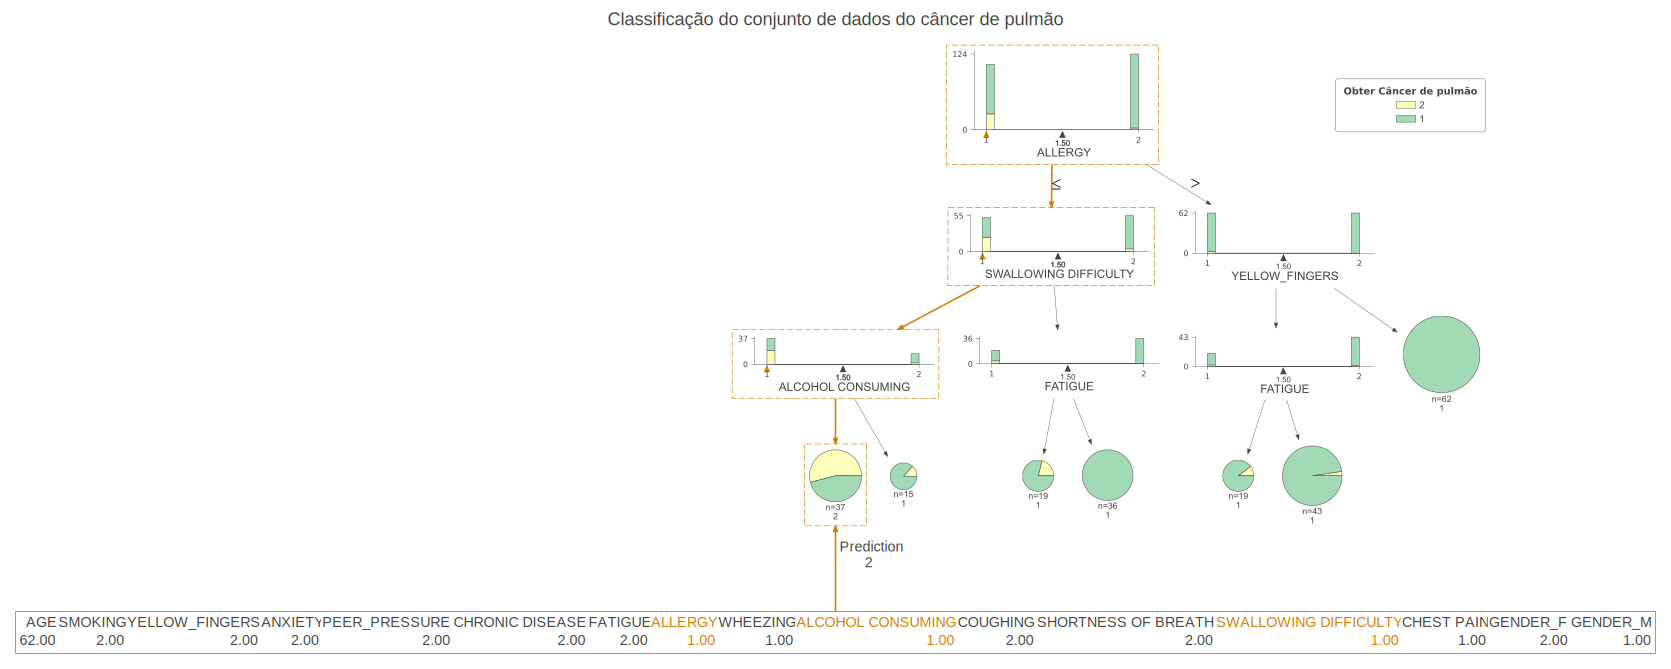

<Figure size 1800x1440 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
# escolhe observação X aleatória para demonstração 
X = X_train.iloc[np.random.randint(0, len(X_train)),:].values
viz = dtreeviz(clf,
               X_train,
               y_train,
               target_name='Obter Câncer de pulmão',
               feature_names=X_train.columns,
               title="Classificação do conjunto de dados do câncer de pulmão",
               class_names=['2', '1'],
               scale=1.3,
               X=X)
viz